In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns



In [ ]:
#load data to dataframe

In [2]:
df = pd.read_csv('/Users/ashwinrajh/Desktop/Programming/Final Projects/Project 2_Absenteeism at Work Prediction/MFGEmployees4.csv')
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [ ]:
#use labelencoder for categorical columns to change them into int

In [3]:
categorical_columns = ['Surname','GivenName','Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col + '_Encoded'] = label_encoder.fit_transform(df[col])
df = df.drop(categorical_columns, axis=1)

In [4]:
df

,EmployeeNumber,Age,LengthService,AbsentHours,Surname_Encoded,GivenName_Encoded,Gender_Encoded,City_Encoded,JobTitle_Encoded,DepartmentName_Encoded,StoreLocation_Encoded,Division_Encoded,BusinessUnit_Encoded
0,1,32.028816,6.018478,36.577306,1555,1140,0,28,4,4,4,5,1
1,2,40.320902,5.532445,30.165072,1617,1452,1,51,4,4,17,5,1
2,3,48.822047,4.389973,83.807798,940,264,1,179,4,4,28,5,1
3,4,44.599357,3.081736,70.020165,3414,687,0,226,4,4,36,5,1
4,5,35.697876,3.619091,0.000000,945,449,1,143,4,4,20,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,46.057544,4.838288,93.665111,765,159,0,120,9,6,16,5,1
8332,8333,34.455490,2.427274,0.000000,818,770,1,137,9,6,11,5,1
8333,8334,58.347160,4.009393,176.356940,1661,1072,0,228,9,6,37,5,1
8334,8335,43.340616,6.154837,60.321917,2985,1504,0,222,14,7,34,5,1


In [23]:
k = 10
top_features = df.corr()['AbsentHours'].abs().sort_values(ascending=False).head(k).index
top_features

Index(['AbsentHours', 'Age', 'Gender_Encoded', 'LengthService',
       'Division_Encoded', 'BusinessUnit_Encoded', 'GivenName_Encoded',
       'JobTitle_Encoded', 'DepartmentName_Encoded', 'StoreLocation_Encoded'],
      dtype='object')

In [25]:
df_selected = df[top_features]
df_selected

,AbsentHours,Age,Gender_Encoded,LengthService,Division_Encoded,BusinessUnit_Encoded,GivenName_Encoded,JobTitle_Encoded,DepartmentName_Encoded,StoreLocation_Encoded
0,36.577306,32.028816,0,6.018478,5,1,1140,4,4,4
1,30.165072,40.320902,1,5.532445,5,1,1452,4,4,17
2,83.807798,48.822047,1,4.389973,5,1,264,4,4,28
3,70.020165,44.599357,0,3.081736,5,1,687,4,4,36
4,0.000000,35.697876,1,3.619091,5,1,449,4,4,20
...,...,...,...,...,...,...,...,...,...,...
8331,93.665111,46.057544,0,4.838288,5,1,159,9,6,16
8332,0.000000,34.455490,1,2.427274,5,1,770,9,6,11
8333,176.356940,58.347160,0,4.009393,5,1,1072,9,6,37
8334,60.321917,43.340616,0,6.154837,5,1,1504,14,7,34


In [26]:
correlation_matrix = df_selected.corr()

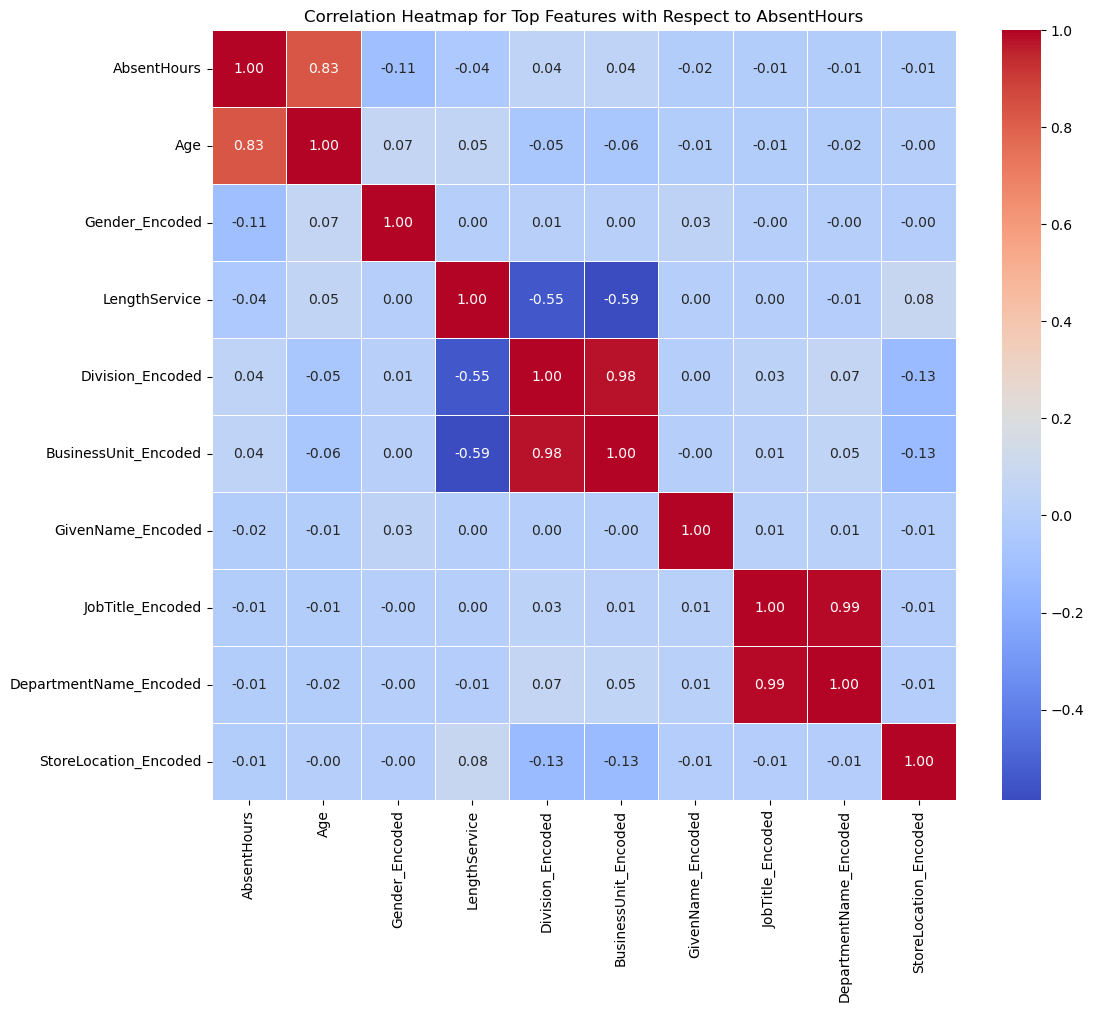

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Top Features with Respect to AbsentHours')
plt.show()

In [ ]:
#Get Features(X) and Target(Y)

In [5]:
X = df.drop('AbsentHours', axis = 1).values
Y = df['AbsentHours'].values

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#Ridge Regression model

In [33]:
ridge_model = Ridge(alpha=0.1) 


k_folds = 5 

kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

min_mse = min(mse_scores)
min_rmse = min(rmse_scores)
max_r2 = max(r2_scores)

print(f'Minimum Mean Squared Error (MSE): {min_mse}')
print(f'Minimum Root Mean Squared Error (RMSE): {min_rmse}')
print(f'Maximum R-Square Score: {max_r2}')
#Ridge Regression

Minimum Mean Squared Error (MSE): 593.5243041638419
Minimum Root Mean Squared Error (RMSE): 24.362354240997355
Maximum R-Square Score: 0.7513197417783806


In [34]:
#Random Forest Regression model

In [35]:

rfr_model = RandomForestRegressor(random_state=1)



k_folds = 5 
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    rfr_model.fit(X_train, y_train)

    y_pred = rfr_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

min_mse = min(mse_scores)
min_rmse = min(rmse_scores)
max_r2 = max(r2_scores)

print(f'Minimum Mean Squared Error (MSE): {min_mse}')
print(f'Minimum Root Mean Squared Error (RMSE): {min_rmse}')
print(f'Maximum R-Square Score: {max_r2}')
#Random Forest Regression model

Minimum Mean Squared Error (MSE): 558.6883941154392
Minimum Root Mean Squared Error (RMSE): 23.636590154153776
Maximum R-Square Score: 0.7659156109710101


In [ ]:
#Applying PCA Framework to get components

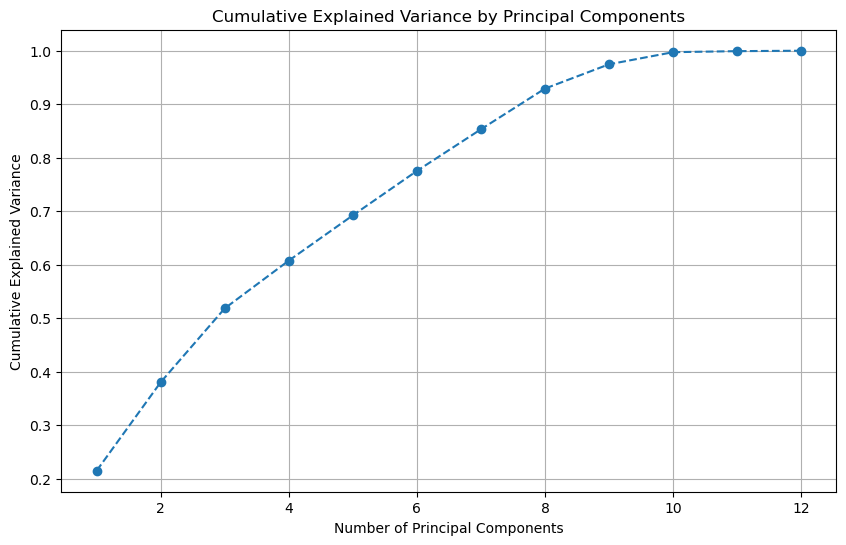

In [30]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [9]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components_for_95_variance = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to retain 95% variance:", num_components_for_95_variance)


Number of components to retain 95% variance: 9


In [10]:
X_selected_pca = X_pca[:, :num_components_for_95_variance]

In [ ]:
#PCA Framework - ridge regression model

In [11]:
ridge_model = Ridge(alpha=0.1) 
k_folds = 5  

kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_selected_pca):
    X_train, X_test = X_selected_pca[train_index], X_selected_pca[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

min_mse = min(mse_scores)
min_rmse = min(rmse_scores)
max_r2 = max(r2_scores)

print(f'Minimum Mean Squared Error (MSE): {min_mse}')
print(f'Minimum Root Mean Squared Error (RMSE): {min_rmse}')
print(f'Maximum R-Square Score: {max_r2}')
#PCA Framework - ridge regression model

Minimum Mean Squared Error (MSE): 593.0751871479505
Minimum Root Mean Squared Error (RMSE): 24.353135057892455
Maximum R-Square Score: 0.7515079169461034


In [ ]:
#PCA Framework - RandomForest regression model

In [15]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()



k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=1)

mse_scores = []
rmse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_selected_pca):
    X_train, X_test = X_selected_pca[train_index], X_selected_pca[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    rfr_model.fit(X_train, y_train)

    y_pred = rfr_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

min_mse = min(mse_scores)
min_rmse = min(rmse_scores)
max_r2 = max(r2_scores)

print(f'Minimum Mean Squared Error (MSE): {min_mse}')
print(f'Minimum Root Mean Squared Error (RMSE): {min_rmse}')
print(f'Maximum R-Square Score: {max_r2}')
#PCA Framework - RandomForest regression model

Minimum Mean Squared Error (MSE): 568.459838192318
Minimum Root Mean Squared Error (RMSE): 23.842395814857156
Maximum R-Square Score: 0.7618214816839884


In [ ]:
#PCA Framework - RandomForest regression model
Minimum Mean Squared Error (MSE): 568.459838192318
Minimum Root Mean Squared Error (RMSE): 23.842395814857156
Maximum R-Square Score: 0.7618214816839884
    
#PCA Framework - RandomForest regression model
Minimum Mean Squared Error (MSE): 593.0751871479505
Minimum Root Mean Squared Error (RMSE): 24.353135057892455
Maximum R-Square Score: 0.7515079169461034

#Random Forest Regression model
Minimum Mean Squared Error (MSE): 558.6883941154392
Minimum Root Mean Squared Error (RMSE): 23.636590154153776
Maximum R-Square Score: 0.7659156109710101

#Ridge Regression
Minimum Mean Squared Error (MSE): 593.5243041638419
Minimum Root Mean Squared Error (RMSE): 24.362354240997355
Maximum R-Square Score: 0.7513197417783806



